# Pymaceuticals Inc.
---

### Analysis

- For this study, scientists were studying the effect of different treatments on tumors found in mice.  Looking closely at four of the drugs, Capomulin and Ramicane showed the smallest average tumor size at the end of their regimen.
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mouse_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
complete_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice.
complete_mouse_data["Mouse ID"].nunique()

249

In [46]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = complete_mouse_data[complete_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_ID = duplicate_mice['Mouse ID'].unique()
duplicate_ID


array(['g989'], dtype=object)

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = complete_mouse_data[complete_mouse_data['Mouse ID'].isin(duplicate_ID)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Answer from XPert Learning bot
clean_df = complete_mouse_data[~complete_mouse_data['Mouse ID'].isin(duplicate_mouse_data)]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [54]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_clean = clean_df['Mouse ID'].nunique()

num_unique_mice_clean

249

## Summary Statistics

In [55]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
 
group_regimen = clean_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

group_regimen_mean = group_regimen['Tumor Volume (mm3)'].mean()
group_regimen_median = group_regimen['Tumor Volume (mm3)'].median()
group_regimen_variance = group_regimen['Tumor Volume (mm3)'].var()
group_regimen_std = group_regimen['Tumor Volume (mm3)'].std()
group_regimen_sem = group_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

drug_data = pd.DataFrame({'Mean Tumor Volume':	group_regimen_mean,
                         'Median Tumor Volume':	group_regimen_median,
                         'Tumor Volume Variance':	group_regimen_variance,
                         'Tumor Volume Std. Dev.': group_regimen_std,
                          'Tumor Volume Std. Err.': group_regimen_sem
                         })

drug_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Answer from Xpert Learning   
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean', 'Median', 'Var', 'STD', 'SEM']
summary_stats

,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

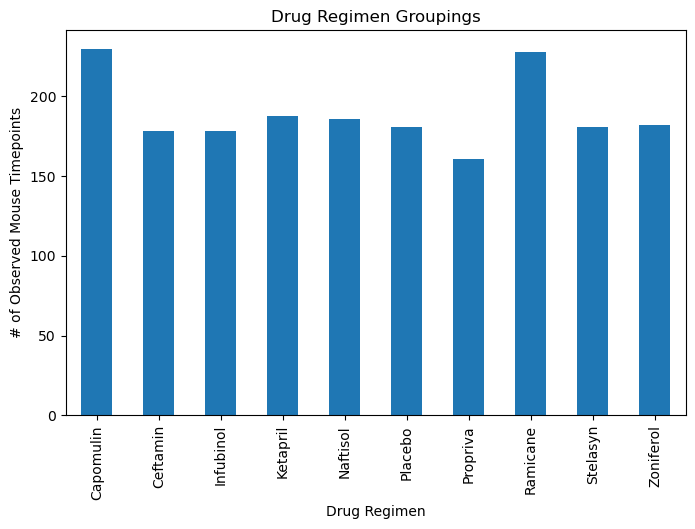

<Figure size 640x480 with 0 Axes>

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = clean_df.groupby('Drug Regimen')
count_types = drug_count["Drug Regimen"].count()

count_types

barchart_drugs1 =  count_types.plot(kind='bar', figsize=(8,5))
#barchart_drugs1 = barchart_drugs1.sort_values("count_types")
barchart_drugs1.set_title("Drug Regimen Groupings")
barchart_drugs1.set_xlabel("Drug Regimen")
barchart_drugs1.set_ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

# ASK Q: .sort_value, ascending = false error
#https://stackoverflow.com/questions/40902958/pandas-dataframe-bar-plot-with-sort-values-by-other-column

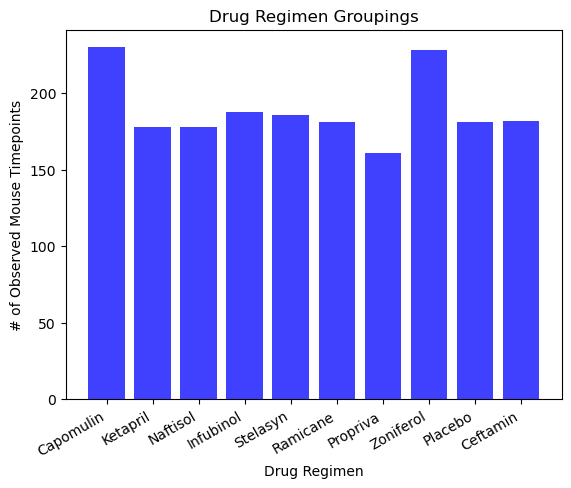

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = clean_df['Drug Regimen'].unique()
drug_amounts = drug_count["Drug Regimen"].count()


plt.bar(drugs, drug_amounts, color='blue', alpha=0.75, align="center")
plt.xticks(rotation=30, ha='right')
plt.title("Drug Regimen Groupings")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


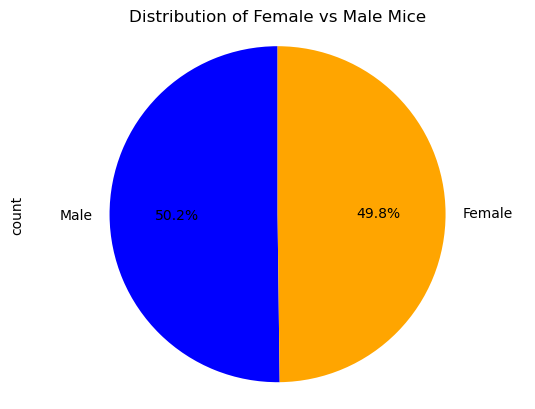

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart
sex_counts = mouse_metadata['Sex'].value_counts()

# Create a pie plot using Pandas
sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal') 

#DataFrame.plot.pie
plt.title('Distribution of Female vs Male Mice')
plt.show()



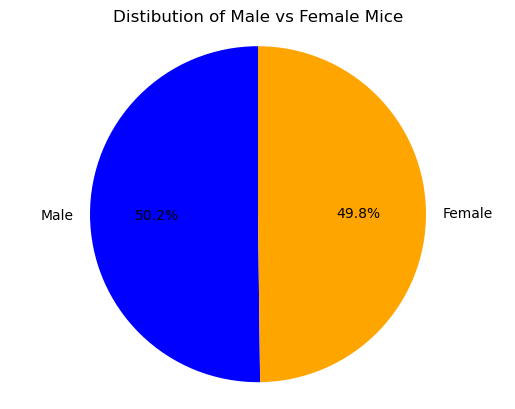

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes =  mouse_metadata['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["blue", "orange"]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Distibution of Male vs Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
greatest_timepoint.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_info = pd.merge(greatest_timepoint, clean_df, how='left', on=['Mouse ID', 'Timepoint'])
merged_info.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [62]:
# PRACTICE: Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
  
   
for treatment in treatments: 
    treatment_compare = merged_info.loc[merged_info['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
   # add subset
    tumor_vol_data.append(treatment_compare)
    

# Determine outliers using upper and lower bounds

    
    quartiles = treatment_compare.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment}  is: {upperq}")
    print(f"The interquartile range of {treatment}  is: {iqr}")
    print(f"The the median of {treatment}  is: {quartiles[0.5]} ")


    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")





The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin  is: 40.1592203
The interquartile range of Capomulin  is: 7.781863460000004
The the median of Capomulin  is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane  is: 40.65900627
The interquartile range of Ramicane  is: 9.098536719999998
The the median of Ramicane  is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol  is: 65.52574285
The interquartile range of Infubinol  is: 11.477135160000003
The the median of Infubinol  is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin  is: 64.29983003
The interqua

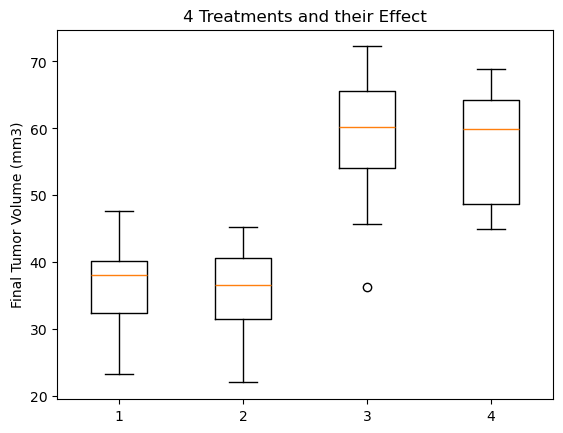

In [63]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('4 Treatments and their Effect')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
plt.show()


## Line and Scatter Plots

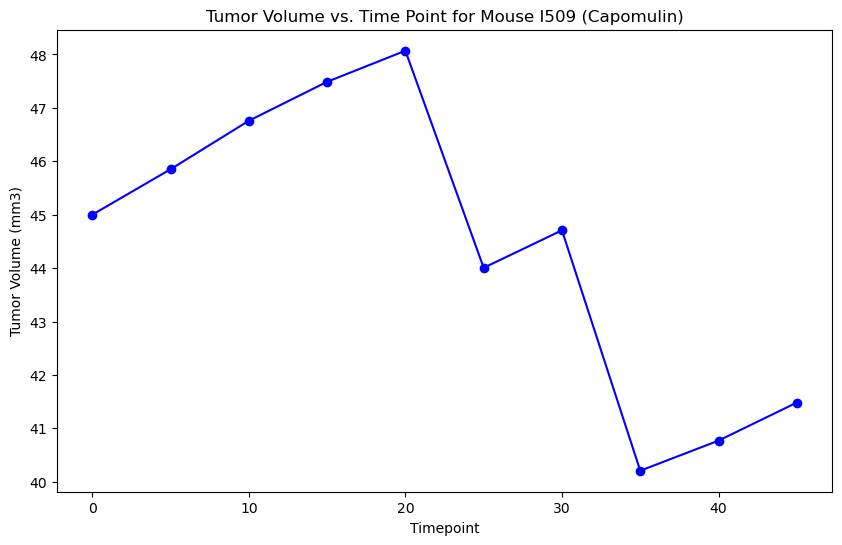

In [64]:

#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse = "l509"
capomulin_mouse = complete_mouse_data.loc[complete_mouse_data["Mouse ID"] == mouse, ["Timepoint", "Tumor Volume (mm3)"]]

plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], marker='o', color='b', label="Tumor Volume vs. Time Point for Mouse l509 (Capomulin)")
plt.title("Tumor Volume vs. Time Point for Mouse I509 (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(False)


# Show the chart
plt.show()

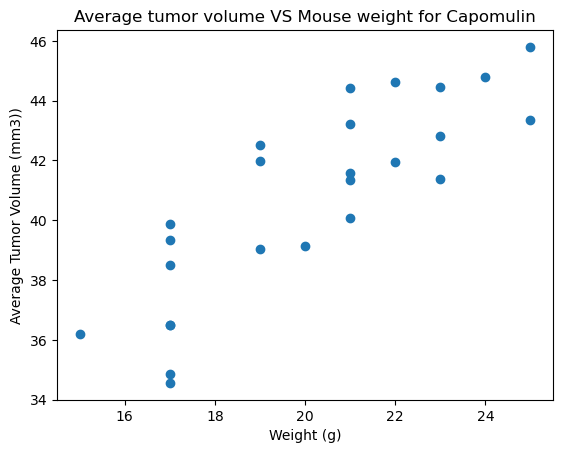

In [65]:

#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_avg = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
average_tumor = capomulin_avg.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()
weight = capomulin_avg.groupby('Mouse ID')["Weight (g)"].mean()

plt.scatter(weight, average_tumor)
plt.title("Average tumor volume VS Mouse weight for Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3))')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723
PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)


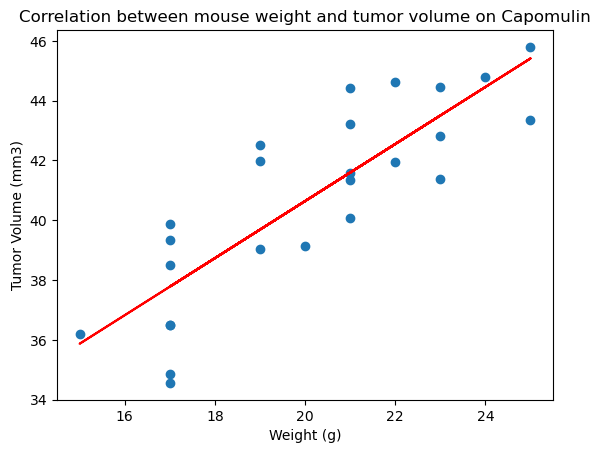

In [68]:
#Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#x_values = ['Weight (g)']
#y_values = ['Tumor Volume (mm3)']

slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, average_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(weight, average_tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Correlation between mouse weight and tumor volume on Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(weight, average_tumor)
print(correlation)
plt.show()
